In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Environment():
    def __init__(self):
        self.grid_size = (8, 6)
        self.valid_headings = np.array([[1, 0], [0, -1], [-1, 0], [0, 1]])

class Agent():
    def __init__(self, env):
        self.env = env
        self.pos = np.zeros(2)
        self.heading = random.choice(env.valid_headings)
        
        
    def reset(self):
        self.pos = np.zeros(2)
        self.heading = random.choice(self.env.valid_headings)
        
        
    def step(self, verbose=False):
        action = random.choice(['f', 'l', 'r', None])
        if action:
            if action == 'f':
                rot = np.array([[1, 0], [0, 1]])
            elif action == 'l':
                rot = np.array([[0, -1], [1, 0]])
            elif action == 'r':
                rot = np.array([[0, 1], [-1, 0]])
            
            self.heading = np.dot(rot, self.heading)
            self.pos = np.add(self.pos, self.heading)
            
            self.pos[0] = np.mod(self.pos[0], self.env.grid_size[0])
            self.pos[1] = np.mod(self.pos[1], self.env.grid_size[1])
        
        if verbose:
            print("pos: {:10}, action: {:5}, heading: {:10}".format(a.pos, action, a.heading))

In [3]:
e = Environment()
a = Agent(e)

In [32]:
# target = (0, 0)

n_trials = 50000
max_steps = 500
verbose = False

e = Environment()
a = Agent(e)
data = pd.Series(index=range(n_trials))

for ii in range(n_trials):
    a.reset()
    target = (0, 0)
    while np.all((0, 0) == target):
        target = (random.randint(0, e.grid_size[0]-1), random.randint(0, e.grid_size[1]-1))

    for step in range(max_steps):
        a.step(verbose=False)
        if np.all(a.pos == target):
            if verbose:
                print("target = {}, trial {:4} complete in {:4} steps".format(target, ii+1, step))
            data[ii] = step
            break

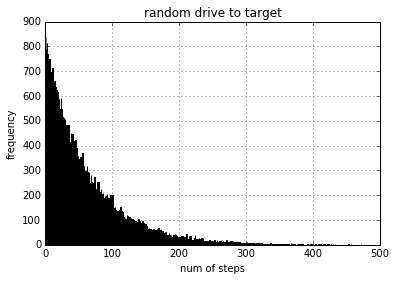

In [33]:
data.hist(bins=500)

plt.title('random drive to target')
plt.ylabel('frequency')
plt.xlabel('num of steps')
plt.savefig('random_drive_hist.png', dpi=240)

In [34]:
data.mean()

61.71508894091282

In [38]:
data.quantile([.25, .5, .9])

0.25     17
0.50     43
0.90    143
dtype: float64